In [46]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [47]:
type(data)

dict

In [48]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')

df

C:\Users\fcmri\AppData\Local\Temp\ipykernel_360\1965705342.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']= pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10414,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19470750.00000,19470750.00000,False,NaN,1,None,None,None,2023-08-29T15:04:00.000Z,27490.76335,17204453288.87297,75.13110,5.13329,5.25106,5.80039,-6.63110,-8.76119,1.70373,535265780431.54065,48.80070,577306030279.39001,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
1,1027,Ethereum,ETH,ethereum,7265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217158.93694,120217158.93694,True,NaN,2,None,None,None,2023-08-29T15:04:00.000Z,1721.97837,6687150388.77015,54.37590,4.29077,4.38502,4.07590,-8.58308,-6.84430,-7.48997,207011347356.85883,18.87340,207011347356.85999,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
2,825,Tether USDt,USDT,tether,60110,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82858157223.82689,85439257711.57307,True,NaN,3,None,None,None,2023-08-29T15:04:00.000Z,1.00051,25075262483.36824,49.00760,0.10512,0.10290,0.08755,0.05101,0.07121,0.03921,82900363753.15961,7.55940,85482779009.39000,None,2023-08-29T15:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-29 15:07:07.164531
3,1839,BNB,BNB,bnb,1576,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153850702.89059,153850702.89059,False,NaN,4,None,None,None,2023-08-29T15:04:00.000Z,230.99978,476775805.70570,31.11610,5.82942,5.66706,11.54107,-5.08277,-1.66886,-24.63727,35539478960.09009,3.24020,35539478960.09000,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
4,52,XRP,XRP,xrp,1040,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52914193551.00000,99988485729.00000,False,NaN,5,None,None,None,2023-08-29T15:04:00.000Z,0.54116,1076538854.02396,28.11210,4.28606,4.25067,5.52388,-24.84472,16.50770,5.79020,28635168130.20770,2.61110,54116232731.79000,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531


In [50]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']= pd.to_datetime('now')

    df= df.append(df2)



In [51]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\fcmri\AppData\Local\Temp\ipykernel_360\3260723996.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp']= pd.to_datetime('now')
C:\Users\fcmri\AppData\Local\Temp\ipykernel_360\3260723996.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API runner completed


KeyboardInterrupt: 

In [52]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10414,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19470750.00000,19470750.00000,False,NaN,1,None,None,None,2023-08-29T15:04:00.000Z,27490.76335,17204453288.87297,75.13110,5.13329,5.25106,5.80039,-6.63110,-8.76119,1.70373,535265780431.54065,48.80070,577306030279.39001,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
1,1027,Ethereum,ETH,ethereum,7265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217158.93694,120217158.93694,True,NaN,2,None,None,None,2023-08-29T15:04:00.000Z,1721.97837,6687150388.77015,54.37590,4.29077,4.38502,4.07590,-8.58308,-6.84430,-7.48997,207011347356.85883,18.87340,207011347356.85999,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
2,825,Tether USDt,USDT,tether,60110,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82858157223.82689,85439257711.57307,True,NaN,3,None,None,None,2023-08-29T15:04:00.000Z,1.00051,25075262483.36824,49.00760,0.10512,0.10290,0.08755,0.05101,0.07121,0.03921,82900363753.15961,7.55940,85482779009.39000,None,2023-08-29T15:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-29 15:07:07.164531
3,1839,BNB,BNB,bnb,1576,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153850702.89059,153850702.89059,False,NaN,4,None,None,None,2023-08-29T15:04:00.000Z,230.99978,476775805.70570,31.11610,5.82942,5.66706,11.54107,-5.08277,-1.66886,-24.63727,35539478960.09009,3.24020,35539478960.09000,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
4,52,XRP,XRP,xrp,1040,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52914193551.00000,99988485729.00000,False,NaN,5,None,None,None,2023-08-29T15:04:00.000Z,0.54116,1076538854.02396,28.11210,4.28606,4.25067,5.52388,-24.84472,16.50770,5.79020,28635168130.20770,2.61110,54116232731.79000,None,2023-08-29T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:07.164531
0,1,Bitcoin,BTC,bitcoin,10414,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19470750.00000,19470750.00000,False,NaN,1,NaN,NaN,None,2023-08-29T15:05:00.000Z,27411.35514,17227192749.70188,75.35720,4.84022,4.95513,5.50890,-6.89775,-9.04878,1.48553,533719643173.11511,48.65030,575638458027.31995,None,2023-08-29T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:10.378505
1,1027,Ethereum,ETH,ethereum,7265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217158.93694,120217158.93694,True,NaN,2,NaN,NaN,None,2023-08-29T15:05:00.000Z,1718.95440,6693521410.36786,54.51790,4.16828,4.22093,3.91657,-8.75044,-7.05821,-7.60839,206647814112.34805,18.83660,206647814112.35001,None,2023-08-29T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-29 15:07:10.378505
2,825,Tether USDt,USDT,tether,60110,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82858157223.82689,85439257711.57307,True,NaN,3,NaN,NaN,None,2023-08-29T15:05:00.000Z,1.00049,25104169260.23456,49.15780,0.09925,0.10051,0.09146,0.05796,0.05658,0.03639,82898799292.57927,7.55930,85481165814.56000,None,2023-08-29T15:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a220

In [53]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [54]:
df3= df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3





,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,4.98675,5.10309,5.65464,-6.76442,-8.90499,1.59463
Ethereum,4.22953,4.30298,3.99623,-8.66676,-6.95126,-7.54918
Tether USDt,0.10219,0.10170,0.08951,0.05449,0.06389,0.03780
BNB,5.78965,5.64611,11.50748,-5.09637,-1.69756,-24.63947
XRP,4.27826,4.24927,5.52181,-24.84526,16.50622,5.79793
USD Coin,0.03936,0.04693,0.07178,0.05798,0.04024,0.06873
Cardano,6.25366,5.24944,8.42227,-11.72970,-0.00801,-25.50043
Dogecoin,3.22124,3.23987,4.05709,-18.44425,1.66609,-8.69410
Solana,6.81474,5.81459,4.65748,-12.83950,19.28922,5.74859


In [55]:
df4= df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      4.98675
             quote.USD.percent_change_24h     5.10309
             quote.USD.percent_change_7d      5.65464
             quote.USD.percent_change_30d    -6.76442
             quote.USD.percent_change_60d    -8.90499
             quote.USD.percent_change_90d     1.59463
Ethereum     quote.USD.percent_change_1h      4.22953
             quote.USD.percent_change_24h     4.30298
             quote.USD.percent_change_7d      3.99623
             quote.USD.percent_change_30d    -8.66676
             quote.USD.percent_change_60d    -6.95126
             quote.USD.percent_change_90d    -7.54918
Tether USDt  quote.USD.percent_change_1h      0.10219
             quote.USD.percent_change_24h     0.10170
             quote.USD.percent_change_7d      0.08951
             quote.USD.percent_change_30d     0.05449
             quote.USD.percent_change_60d     0.06389
             quote.USD.percent_change_90

In [56]:
df5= df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    4.98675
            quote.USD.percent_change_24h   5.10309
            quote.USD.percent_change_7d    5.65464
            quote.USD.percent_change_30d  -6.76442
            quote.USD.percent_change_60d  -8.90499
            quote.USD.percent_change_90d   1.59463
Ethereum    quote.USD.percent_change_1h    4.22953
            quote.USD.percent_change_24h   4.30298
            quote.USD.percent_change_7d    3.99623
            quote.USD.percent_change_30d  -8.66676
            quote.USD.percent_change_60d  -6.95126
            quote.USD.percent_change_90d  -7.54918
Tether USDt quote.USD.percent_change_1h    0.10219
            quote.USD.percent_change_24h   0.10170
            quote.USD.percent_change_7d    0.08951
            quote.USD.percent_change_30d   0.05449
            quote.USD.percent_change_60d   0.06389
            quote.USD.percent_change_90d   0.03780
BNB         quote.USD.percent_change_1h    5.78965
            quote.USD.percent_change_24h   5.64611
            quote.USD.percent_change_7d   11.50748
            quote.USD.percent_change_30d  -5.09637
            quote.USD.percent_change_60d  -1.69756
            quote.USD.percent_change_90d -24.63947
XRP         quote.USD.percent_change_1h    4.27826
            quote.USD.percent_change_24h   4.24927
            quote.USD.percent_change_7d    5.52181
            quote.USD.percent_change_30d -24.84526
            quote.USD.percent_change_60d  16.50622
            quote.USD.percent_change_90d   5.79793
USD Coin    quote.USD.percent_change_1h    0.03936
            quote.USD.percent_change_24h   0.04693
            quote.USD.percent_change_7d    0.07178
            quote.USD.percent_change_30d   0.05798
            quote.USD.percent_change_60d   0.04024
            quote.USD.percent_change_90d   0.06873
Cardano     quote.USD.percent_change_1h    6.25366
            quote.USD.percent_change_24h   5.24944
            quote.USD.percent_change_7d    8.42227
            quote.USD.percent_change_30d -11.72970
            quote.USD.percent_change_60d  -0.00801
            quote.USD.percent_change_90d -25.50043
Dogecoin    quote.USD.percent_change_1h    3.22124
            quote.USD.percent_change_24h   3.23987
            quote.USD.percent_change_7d    4.05709
            quote.USD.percent_change_30d -18.44425
            quote.USD.percent_change_60d   1.66609
            quote.USD.percent_change_90d  -8.69410
Solana      quote.USD.percent_change_1h    6.81474
            quote.USD.percent_change_24h   5.81459
            quote.USD.percent_change_7d    4.65748
            quote.USD.percent_change_30d -12.83950
            quote.USD.percent_change_60d  19.28922
            quote.USD.percent_change_90d   5.74859
TRON        quote.USD.percent_change_1h    1.71940
            quote.USD.percent_change_24h   0.16058
            quote.USD.percent_change_7d    3.54519
            quote.USD.percent_change_30d  -5.15964
            quote.USD.percent_change_60d   2.81973
            quote.USD.percent_change_90d   2.54250
Polkadot    quote.USD.percent_change_1h    3.74984
            quote.USD.percent_change_24h   4.75232
            quote.USD.percent_change_7d    8.62911
            quote.USD.percent_change_30d  -9.39918
            quote.USD.percent_change_60d  -4.09147
            quote.USD.percent_change_90d -10.24840
Polygon     quote.USD.percent_change_1h    8.85996
            quote.USD.percent_change_24h   7.57124
            quote.USD.percent_change_7d   13.27231
            quote.USD.percent_change_30d -14.73551
            quote.USD.percent_change_60d  -3.25095
            quote.USD.percent_change_90d -31.69069
Toncoin     quote.USD.percent_change_1h    5.24874
            quote.USD.percent_change_24h   7.41330
            quote.USD.percent_change_7d   16.87771
            quote.USD.percent_change_30d  31.44132
            quote.USD.percent_change_60d  21.73168
            quo

In [57]:
df5.count()

values    90
dtype: int64

In [58]:
index= pd.Index(range(90))
df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,4.98675
1,Bitcoin,quote.USD.percent_change_24h,5.10309
2,Bitcoin,quote.USD.percent_change_7d,5.65464
3,Bitcoin,quote.USD.percent_change_30d,-6.76442
4,Bitcoin,quote.USD.percent_change_60d,-8.90499
5,Bitcoin,quote.USD.percent_change_90d,1.59463
6,Ethereum,quote.USD.percent_change_1h,4.22953
7,Ethereum,quote.USD.percent_change_24h,4.30298
8,Ethereum,quote.USD.percent_change_7d,3.99623
9,Ethereum,quote.USD.percent_change_30d,-8.66676


In [59]:
df7= df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,4.98675
1,Bitcoin,quote.USD.percent_change_24h,5.10309
2,Bitcoin,quote.USD.percent_change_7d,5.65464
3,Bitcoin,quote.USD.percent_change_30d,-6.76442
4,Bitcoin,quote.USD.percent_change_60d,-8.90499
5,Bitcoin,quote.USD.percent_change_90d,1.59463
6,Ethereum,quote.USD.percent_change_1h,4.22953
7,Ethereum,quote.USD.percent_change_24h,4.30298
8,Ethereum,quote.USD.percent_change_7d,3.99623
9,Ethereum,quote.USD.percent_change_30d,-8.66676


In [60]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,4.98675
1,Bitcoin,24h,5.10309
2,Bitcoin,7d,5.65464
3,Bitcoin,30d,-6.76442
4,Bitcoin,60d,-8.90499
5,Bitcoin,90d,1.59463
6,Ethereum,1h,4.22953
7,Ethereum,24h,4.30298
8,Ethereum,7d,3.99623
9,Ethereum,30d,-8.66676


In [61]:
import seaborn as sns
import matplotlib as plt

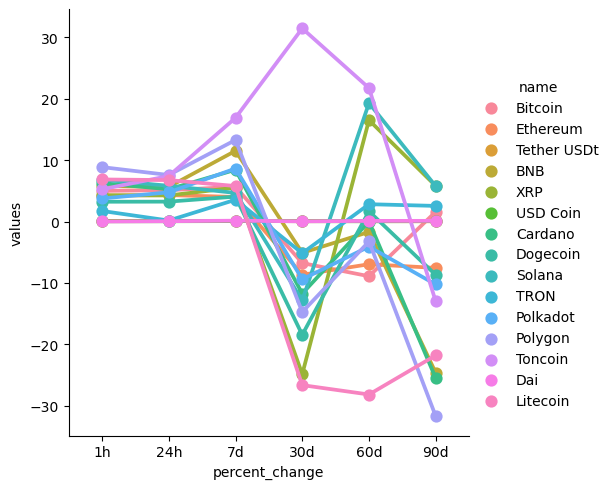

In [62]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [66]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27490.76335,2023-08-29 15:07:07.164531
0,Bitcoin,27411.35514,2023-08-29 15:07:10.378505


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

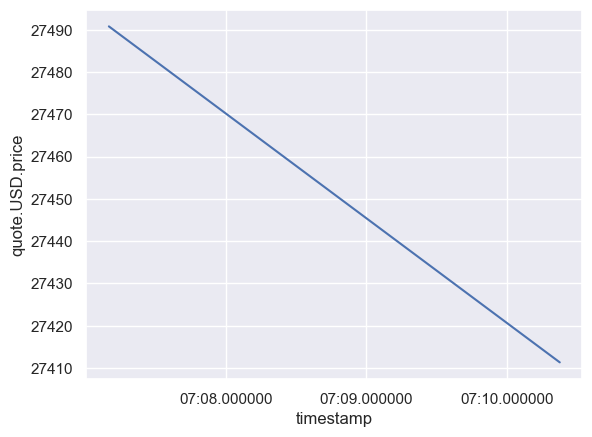

In [67]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)